In [2]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

20220915_105506.csv is the one with 10M row group, zxy cluster, and skipping

scale: linear


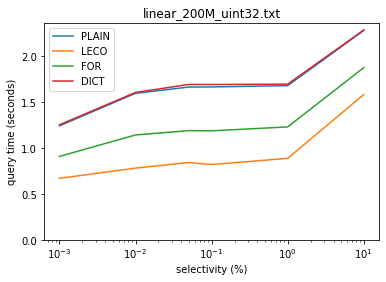

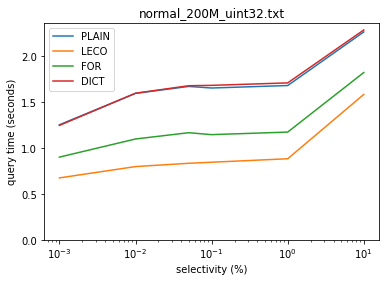

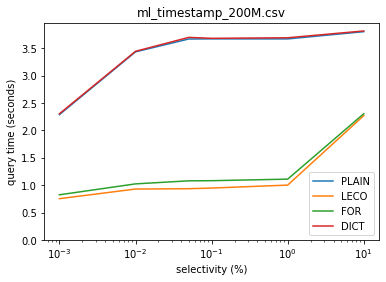

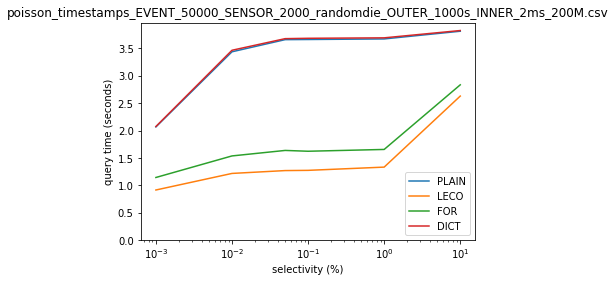

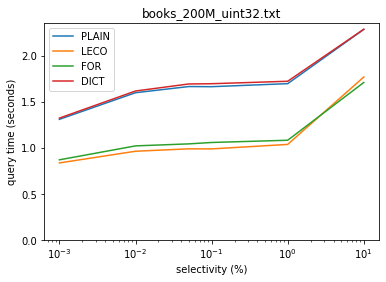

In [3]:
from curses.panel import bottom_panel

PROJ_SRC_DIR = '/root/arrow-private/cpp'
# name='20220904_143952.csv'
# name = f'{PROJ_SRC_DIR}/output/20220905_140614.csv'
# name = f'{PROJ_SRC_DIR}/output/20220913_193623.csv'
# name = f'{PROJ_SRC_DIR}/output/20220914_145832_1M.csv'
# name = f'{PROJ_SRC_DIR}/output/20220916_132957.csv' # no zstd
# name = f'{PROJ_SRC_DIR}/output/20220916_001025.csv' # zstd
# name = f'{PROJ_SRC_DIR}/output/20220917_162524.csv' # add wiki large
# name = f'{PROJ_SRC_DIR}/output/20220926_174950.csv' # add wiki large
# name = f'{PROJ_SRC_DIR}/output/20220930_163227.csv' # add 200M ml ts
name = f'{PROJ_SRC_DIR}/output/20221012_210615.csv' # 32 bit and 64 bit


df = pd.read_csv(name) 
# print(df)
df_avg = df.groupby(['dataset', 'encoding','selectivity'], as_index=False).mean().set_index(['dataset','encoding'])
# print(df_avg)
# print(df_avg.loc['books_200M_uint32.txt', 'DICT'])
dataset_dict = set()
encoding_dict = set()
for i, row in df_avg.iterrows():   
    dataset_dict.add(i[0])
    encoding_dict.add(i[1])

scale = ['linear']
for s in scale:
    print(f'scale: {s}')
    for ds in dataset_dict:
        for enc in encoding_dict:
            # print(ds, enc)
            # print(df_avg.loc[ds, enc])
            plt.plot(df_avg.loc[ds, enc]['selectivity'], df_avg.loc[ds, enc]['query_time'], label=enc)
        plt.yscale(s)
        plt.xscale('log')
        plt.ylim(bottom=0)
        plt.legend()
        plt.xlabel('selectivity (%)')
        plt.ylabel('query time (seconds)')
        plt.title(ds)
        # plt.savefig(f'{ds}_{s}.png')
        plt.show()
# df_avg.loc['books_200M_uint32.txt', 'DICT'].plot(x='selectivity', y='query_time', label='DICT')
# df_avg.plot()
# plt.show()

In [13]:
import scipy.stats
dist = scipy.stats.binom(1, 0.5)

In [14]:
import numpy as np
NUM_KEYS = 100
prob_ = 0.4
keys1 = np.random.choice([0, 1], size=NUM_KEYS//2, p=[1.0-prob_*0.1, prob_*0.1])
keys2 = np.random.choice([0, 1], size=NUM_KEYS//2, p=[1.0-prob_*1.9, prob_*1.9])
print(np.concatenate((keys1, keys2)))
# print(type(keys1))
# print(np.concatenate(np.array(keys1).astype(np.uint32), np.array(keys2).astype(np.uint32)))

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1]


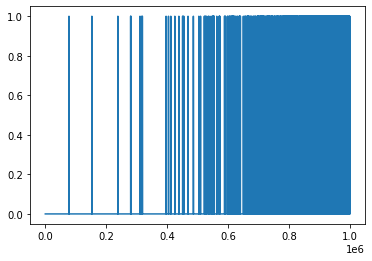

In [3]:
# file = open('/root/arrow-private/cpp/Learn-to-Compress/data/bitmap_lyh/bitmap_random_1e-05_200000000.txt', 'r')
file = open('/root/arrow-private/cpp/Learn-to-Compress/data/bitmap_random_cluster/bitmap_random_0.01_1000000.txt', 'r')
lines = file.readlines()
file.close()
bitmap = []
for line in lines:
    bitmap.append(int(line))
import matplotlib.pyplot as plt
plt.plot(bitmap)

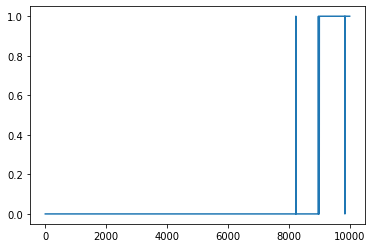

In [16]:
plt.plot(bitmap[0:20000000])

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_bar(IT, ECE, encoding_map, file_name):
    # set width of bar
    barWidth = 0.25
    fig, ax = plt.subplots(figsize =(8, 4))
    
    # set height of bar
    # IT = [12, 30, 1, 8, 22]
    # ECE = [28, 6, 16, 5, 10]
    
    # Set position of bar on X axis
    br1 = np.arange(len(IT))
    br2 = [x + barWidth for x in br1]
    
    # Make the plot
    plt.bar(br1, IT, color ='r', width = barWidth,
            edgecolor ='grey', label ='no zstd')
    plt.bar(br2, ECE, color ='g', width = barWidth,
            edgecolor ='grey', label ='zstd')
    
    # Adding Xticks
    plt.xlabel(file_name, fontweight ='bold', fontsize = 15)
    plt.ylabel('File Size (bytes)', fontweight ='bold', fontsize = 15)
    plt.xticks([r + barWidth for r in range(len(IT))],
            encoding_map.keys())
    
    plt.legend()
    plt.show()

/tmp/ipykernel_3589/1726567516.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file': f, 'compression': comp, 'encoding': encoding, 'size': size}, ignore_index=True)
/tmp/ipykernel_3589/1726567516.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file': f, 'compression': comp, 'encoding': encoding, 'size': size}, ignore_index=True)
/tmp/ipykernel_3589/1726567516.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file': f, 'compression': comp, 'encoding': encoding, 'size': size}, ignore_index=True)
/tmp/ipykernel_3589/1726567516.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

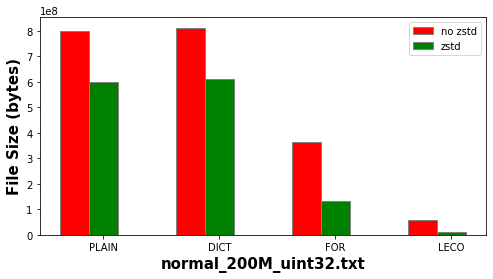

/tmp/ipykernel_3589/1726567516.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file': f, 'compression': comp, 'encoding': encoding, 'size': size}, ignore_index=True)
/tmp/ipykernel_3589/1726567516.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file': f, 'compression': comp, 'encoding': encoding, 'size': size}, ignore_index=True)
/tmp/ipykernel_3589/1726567516.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file': f, 'compression': comp, 'encoding': encoding, 'size': size}, ignore_index=True)
/tmp/ipykernel_3589/1726567516.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

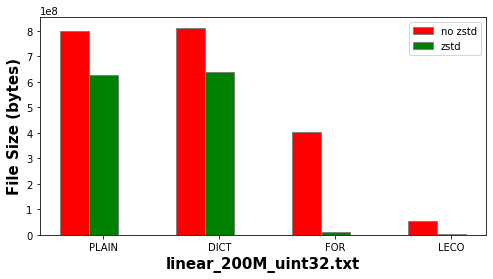

/tmp/ipykernel_3589/1726567516.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file': f, 'compression': comp, 'encoding': encoding, 'size': size}, ignore_index=True)
/tmp/ipykernel_3589/1726567516.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file': f, 'compression': comp, 'encoding': encoding, 'size': size}, ignore_index=True)
/tmp/ipykernel_3589/1726567516.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file': f, 'compression': comp, 'encoding': encoding, 'size': size}, ignore_index=True)
/tmp/ipykernel_3589/1726567516.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

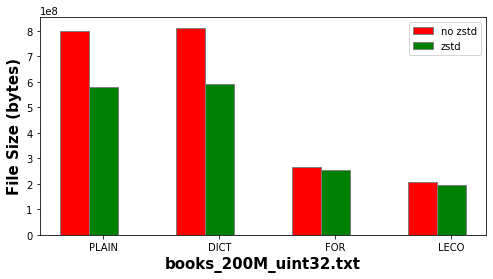

/tmp/ipykernel_3589/1726567516.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file': f, 'compression': comp, 'encoding': encoding, 'size': size}, ignore_index=True)
/tmp/ipykernel_3589/1726567516.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file': f, 'compression': comp, 'encoding': encoding, 'size': size}, ignore_index=True)
/tmp/ipykernel_3589/1726567516.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file': f, 'compression': comp, 'encoding': encoding, 'size': size}, ignore_index=True)
/tmp/ipykernel_3589/1726567516.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

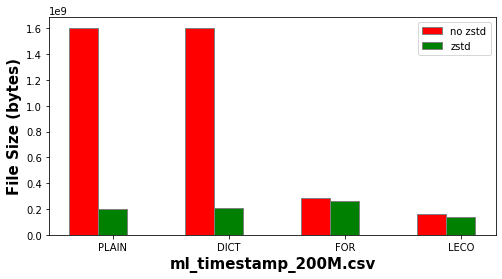

/tmp/ipykernel_3589/1726567516.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file': f, 'compression': comp, 'encoding': encoding, 'size': size}, ignore_index=True)
/tmp/ipykernel_3589/1726567516.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file': f, 'compression': comp, 'encoding': encoding, 'size': size}, ignore_index=True)
/tmp/ipykernel_3589/1726567516.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'file': f, 'compression': comp, 'encoding': encoding, 'size': size}, ignore_index=True)
/tmp/ipykernel_3589/1726567516.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

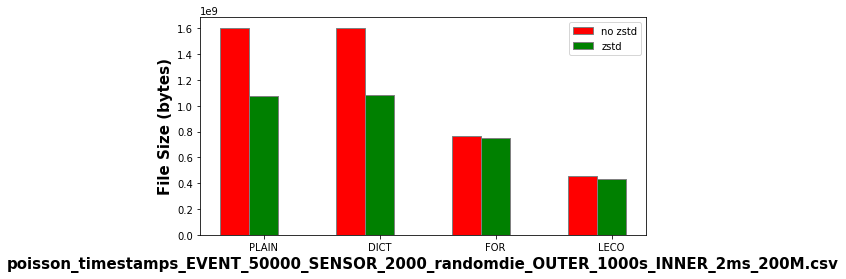

In [4]:
PROJ_SRC_DIR = '/root/arrow-private/cpp'
encoding_map = {'PLAIN': 0, 'DICT': 8, 'FOR': 10, 'LECO': 11}
rowgroup = 10485760
datasize = 209715200
files = ["normal_200M_uint32.txt", "linear_200M_uint32.txt", "books_200M_uint32.txt", 
'ml_timestamp_200M.csv', 'poisson_timestamps_EVENT_50000_SENSOR_2000_randomdie_OUTER_1000s_INNER_2ms_200M.csv']
compression = ['', '.zstd']
import os
os.chdir(f"{PROJ_SRC_DIR}/out/build/leco-release/release")
df = pd.DataFrame({c: pd.Series(dtype=t) for c, t in {'file': 'str', 'compression': 'str', 'encoding': 'str', 'size': 'int64'}.items()})
for f in files:
    result = []
    for comp in compression:
        comp_res = []
        for encoding in encoding_map:
            size = os.path.getsize(f'encoding{encoding_map[encoding]}_rowgroup{rowgroup}_datasize{datasize}{f}{comp}.parquet')
            comp_res.append(size)
            df = df.append({'file': f, 'compression': comp, 'encoding': encoding, 'size': size}, ignore_index=True)
        result.append(comp_res)
    plot_bar(result[0], result[1], encoding_map ,f)
df.to_csv(f'{PROJ_SRC_DIR}/output/zstd_result_new.csv', index=False)